# Glacial ice line model with obliquity forcing

In [1]:
import numpy as np
import scipy as scipy
import scipy.stats as stats
import scipy.linalg as linalg
from scipy.integrate import solve_ivp
from pprint import pprint

import matplotlib.gridspec as gridspec
import matplotlib.path as mpath
import matplotlib.pyplot as plt

import sys
import os
import copy
import string
import glob
import xarray as xr 

import warnings
import warnings

from custom_functions import *
from IceLineModForcing import *

In [2]:
R = 1.                   # Surface layer heat capacity (W/m^2K)
Q = 343.                 # Annual average insolation (W/m^2)
a1 = 0.32                # Albedo between ice line latitudes
a2 = 0.62                # Albedo polewards of ice line latitudes
A = 202.                 # Greenhouse gas parameter (W/m^2)
B = 1.9                  # Outgoing radiation (W/m^2K)
C = 3.04                 # Efficiency of heat transport (W/m^2K)
T_cS = -10.              # critical temperature south line (^oC)
T_cNpos = -10.           # critical temperature north line when retreating (^oC)
T_cNneg = -5.            # critical temperature north line when advancing (^oC)
p = 0.3                  # Ice line response to temp change (1/(K yr))
eps = 0.03               # mass balance response to albedo change 
a = 1.05                 # accumulation rate
b = 1.75                 # critical ablation rate
bpos = 5                 # interglacial ablation rate
bneg = 1.5               # glacial ablation rate
betaMin = np.pi*22.5/180 # Obliquity (radians)
betaMax = np.pi*24.5/180 # Obliquity (radians)
period = 81              # forcing period (years)
periodrad = 2*np.pi/period # period into radians
sd = 0.1                 # standard deviation of noise
 
pars = np.array([R,Q,a1,a2,A,B,C,T_cS,T_cNpos,T_cNneg,p,eps,a,b,bpos,bneg,betaMin,betaMax,periodrad,sd])

In [3]:
# define initial conditions
n01 = np.array([1,-0.9,0.8,0.9])              # initial condition 1 
n02 = np.array([1,-0.9,0.8,0.9])                # initial condition 2 
tspan = [0,500]                             # time interval to calculate trajectory 
h = 0.1                                 # time step size

# Solve the ODE
[X,t,xeq1] = MyIVP(lambda t,n:IL(t,n,pars),n01,tspan,h);
pars[11] = 0.3
[X2,t2,xeq2] = MyIVP(lambda t,n:IL(t,n,pars),n02,tspan,h);

X = np.squeeze(X)
xeq1 = np.squeeze(xeq1)
X2 = np.squeeze(X2)
xeq2 = np.squeeze(xeq2)

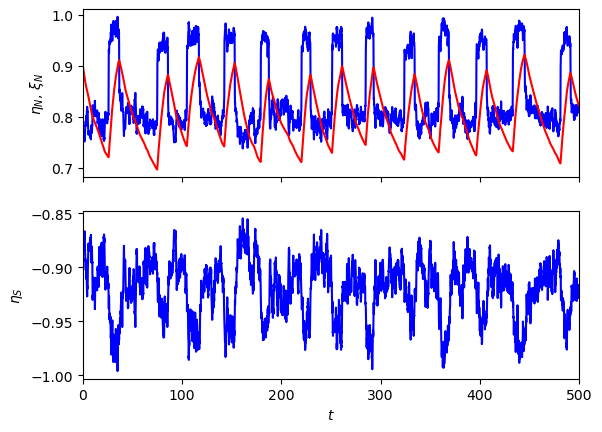

In [4]:
# plot solution trajectory
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(t,X[2,:], color = "blue")
ax1.plot(t,X[3,:], color = "red")
ax2.plot(t,X[1,:], color = "blue")
ax1.set(ylabel = "$\eta_N$, $\\xi_N$")
ax2.set(xlabel = "$t$", ylabel = "$\eta_S$")
ax1.set_xlim([0, 500])
plt.show()

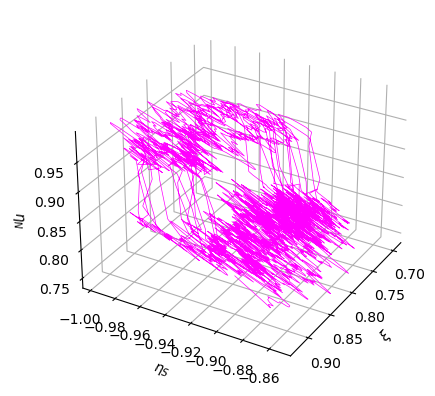

In [5]:
# plot in 3d
ax = plt.figure().add_subplot(projection='3d')
ax.plot(X[3,:],X[1,:],X[2,:], color='magenta', lw=0.5)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlabel("$\\xi$")
ax.set_ylabel("$\eta_S$")
ax.set_zlabel("$\eta_N$")
ax.view_init(30,30)

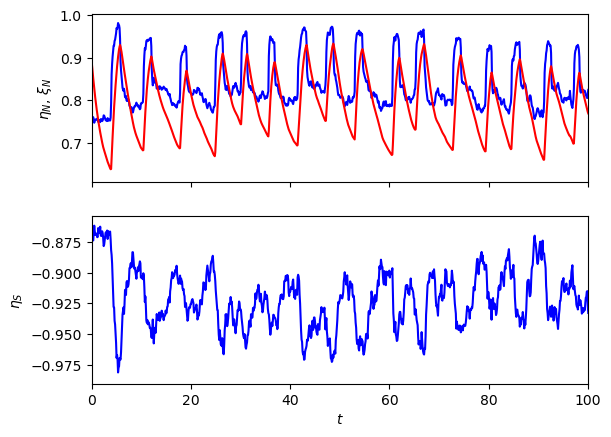

In [6]:
# plot solution trajectory
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(t2,X2[2,:], color = "blue")
ax1.plot(t2,X2[3,:], color = "red")
ax2.plot(t2,X2[1,:], color = "blue")
ax1.set(ylabel = "$\eta_N$, $\\xi_N$")
ax2.set(xlabel = "$t$", ylabel = "$\eta_S$")
ax1.set_xlim([0, 100])
plt.show()

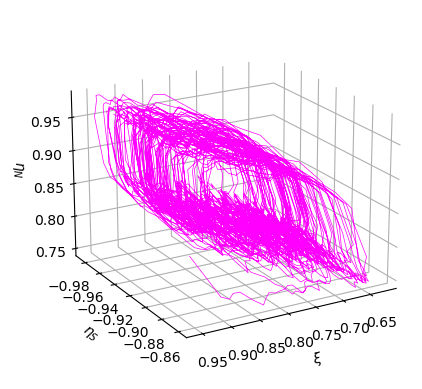

In [7]:
# plot in 3d
ax = plt.figure().add_subplot(projection='3d')
ax.plot(X2[3,:],X2[1,:],X2[2,:], color='magenta', lw=0.5)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlabel("$\\xi$")
ax.set_ylabel("$\eta_S$")
ax.set_zlabel("$\eta_N$")
ax.view_init(20, 60)